In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
Uni_df=pd.read_excel("Universities.xlsx")
Uni_df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# Standardization -3 to 3

In [8]:
std_scaler_model=StandardScaler()
scaled_df=std_scaler_model.fit_transform(Uni_df.iloc[:,1:])
scaled_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

## Define the K - number of clusters

In [11]:
within_clusters_sum_of_squares=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    within_clusters_sum_of_squares.append(kmeans.inertia_)
print(within_clusters_sum_of_squares)

[150.0, 64.1452839501027, 49.69054164653248, 39.10499162989724, 26.455250846437877, 23.43401544717756, 20.329570774749417, 19.401198384087085, 13.226744772273472]


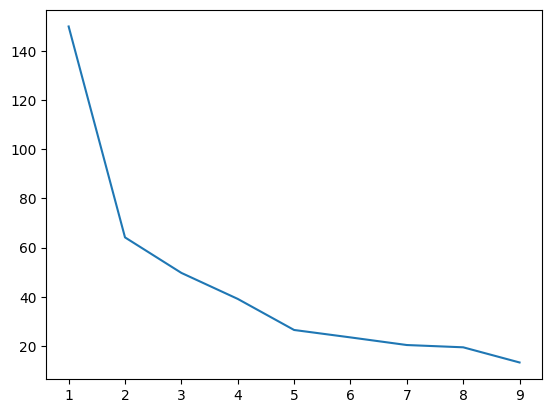

In [12]:
plt.plot(range(1,10),within_clusters_sum_of_squares)

In [13]:
kmeans_final=KMeans(n_clusters=4)
kmeans_final.fit(scaled_df)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [14]:
y=kmeans_final.predict(scaled_df)

In [15]:
y

array([3, 2, 1, 3, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 1, 1,
       1, 0, 3], dtype=int32)

In [16]:
Uni_df["Clusters"]=y

In [18]:
Uni_df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2
